In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# Source: World Bank through https://github.com/datasets/gini-index
gini_df = pd.read_csv("gini-index.csv")

country2year = dict()
for i, row in gini_df.iterrows():
    y = int(row.Year)
    c = row['Country Name']
    if y >= 2008 and country2year.get(c, -1) < y:
        country2year[c] = y

In [3]:
gini_df = pd.DataFrame(
    [ (c, y, gini_df[ (gini_df['Country Name'] == c) & (gini_df.Year == y)].Value.values[0])
     for (c, y) in sorted(country2year.items())],
    columns=['Country', 'Year', 'Gini']
)

In [4]:
gini_df

,Country,Year,Gini
0,Albania,2012,29.0
1,Algeria,2011,27.6
2,Angola,2008,42.7
3,Argentina,2016,42.4
4,Armenia,2016,32.5
5,Australia,2010,34.7
6,Austria,2015,30.5
7,Bangladesh,2016,32.4
8,Belarus,2016,27.0
9,Belgium,2015,27.7


In [5]:
# Source: http://www.digitalnewsreport.org/survey/2020/overview-key-findings-2020/

share_view_df = pd.read_csv("data-UTAPV.csv")

In [6]:
share_view_df.Country = (share_view_df.Country
                         .replace('UK', 'United Kingdom')
                         .replace('USA', 'United States'))

In [7]:
set(share_view_df.Country) - set(gini_df.Country)

set()

In [8]:
df = share_view_df.merge(gini_df)
df

,Country,Share your point of view,No point of view,Challenge your point of view,Year,Gini
0,Germany,15,80,5,2015,31.7
1,Japan,17,78,6,2008,32.1
2,United Kingdom,13,76,11,2015,33.2
3,Denmark,14,68,18,2015,28.2
4,Spain,34,55,11,2015,36.2
5,Italy,22,65,13,2015,35.4
6,United States,30,60,10,2016,41.5
7,France,20,58,22,2015,32.7
8,Brazil,43,51,6,2015,51.3


In [9]:
colors = dict(zip(df.Country, map(plt.cm.Dark2, np.arange(0, 1., 1./len(df))[:, np.newaxis])))

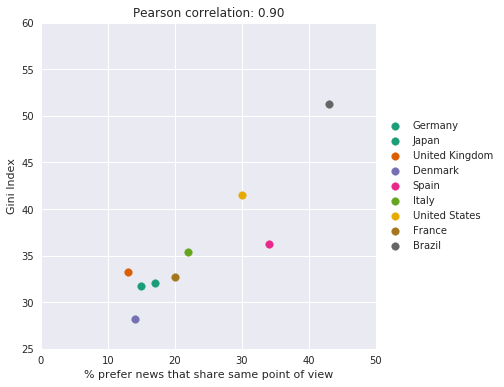

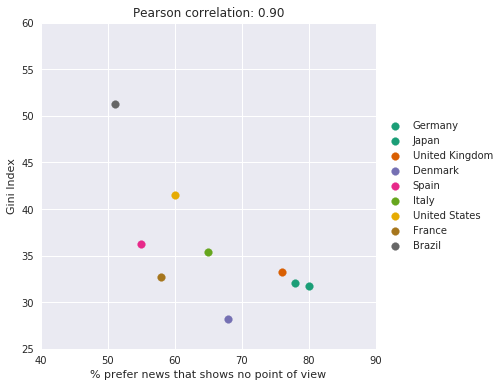

In [10]:
plt.style.use('seaborn')
for x_label, x_lim in (('Share your point of view', (0, 50)), ('No point of view', (40, 90))):
    plt.figure(figsize=(6, 6))
    plt.title("Pearson correlation: %.2f" % df[['Share your point of view', 'Gini']].corr().values[0, 1])
    
    for country, x, y in df[['Country', x_label, 'Gini']].values:
        plt.scatter(x, y, label=country, s=60, c=colors[country])
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(f"% prefer news that {x_label.lower().replace('your', 'same').replace('no ', 'shows no ')}")
    plt.ylabel("Gini Index")
    plt.xlim(*x_lim)
    plt.ylim((25, 60))
    plt.savefig(x_label.lower().replace(' ', '-') + '.png', dpi=600,
               bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()